#1. Extracción de archivo tratado

In [ ]:
import pandas as pd
df= pd.read_csv("/content/Datos_normalizados.csv")
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.9,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


#2. Eliminación de columnas irrelevantes

In [53]:
# Reemplazar espacios en blanco por 0 en la columna 'Charges.Total'
df['Charges.Total'] = df['Charges.Total'].replace(' ', 0)

In [54]:
df.drop(columns="customerID", inplace=True)
df

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_diarias
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3,2.186667
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4,1.996667
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,No,Female,0,No,No,13,Yes,No,DSL,Yes,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.9,1.838333
7263,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7,2.836667
7264,No,Male,0,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


In [55]:
df.groupby('Churn', dropna=False).size()


,0
Churn,
No,5174
Yes,1869
NaN,224


#3. Encoding

In [56]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0}).fillna(1).astype(int)
df["gender"] = df["gender"].map({"Female": 1, "Male": 0}).fillna(2).astype(int)
df["Partner"] = df["Partner"].map({"Yes": 1, "No": 0}).fillna(2).astype(int)
df["Dependents"] = df["Dependents"].map({"Yes": 1, "No": 0}).fillna(2).astype(int)
df["PhoneService"] = df["PhoneService"].map({"Yes": 1, "No": 0}).fillna(2).astype(int)
df["PaperlessBilling"] = df["PaperlessBilling"].map({"Yes": 1, "No": 0}).fillna(2).astype(int)
df['Charges.Total'] = (df['Charges.Total'].replace(r'^\s*$', 0, regex=True)  # reemplaza espacios en blanco por 0
    .fillna(0)                         # reemplaza NaN por 0
    .astype(float)                     # convierte a float
)


In [57]:
categoricas =['MultipleLines','InternetService','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod','OnlineBackup']
datos_codificados=pd.get_dummies(data=df,columns=categoricas,dtype=int)
datos_codificados

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes
0,0,1,0,1,1,9,1,1,65.60,593.30,...,0,1,0,0,0,0,1,0,0,1
1,0,0,0,0,0,9,1,0,59.90,542.40,...,1,0,0,0,0,0,1,1,0,0
2,1,0,0,0,0,4,1,1,73.90,280.85,...,1,0,0,0,0,1,0,1,0,0
3,1,0,1,1,0,13,1,1,98.00,1237.85,...,1,0,0,0,0,1,0,0,0,1
4,1,1,1,1,0,3,1,1,83.90,267.40,...,1,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,1,0,0,0,13,1,0,55.15,742.90,...,0,1,0,0,0,0,1,1,0,0
7263,1,0,0,1,0,22,1,1,85.10,1873.70,...,1,0,0,0,0,1,0,1,0,0
7264,0,0,0,0,0,2,1,1,50.30,92.75,...,1,0,0,0,0,0,1,0,0,1
7265,0,0,0,1,1,67,1,0,67.85,4627.65,...,0,0,1,0,0,0,1,1,0,0


In [34]:
#datos_codificados=df.copy()
#datos_codificados

#4. Verificación de la Proporción de Cancelación (Churn)

In [58]:
# Proporción de cada clase
proporcion = datos_codificados['Churn'].value_counts(normalize=True)
proporcion

,proportion
Churn,
0,0.711986
1,0.288014


#5. Correlación

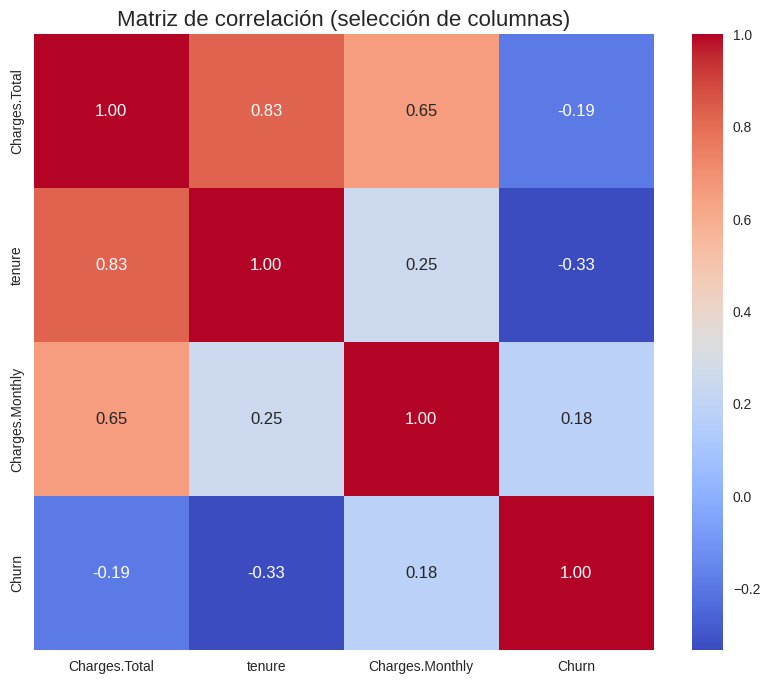

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Selecciona solo las columnas que quieras
cols = ['Charges.Total', 'tenure', 'Charges.Monthly', 'Churn']

# Calcular la correlación solo con esas
correlation_matrix = datos_codificados[cols].corr()

# Graficar
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de correlación (selección de columnas)", fontsize=16)
plt.show()



#6. Análisis Dirigido

## 6.1 Boxplot: Tiempo de contrato × Churn

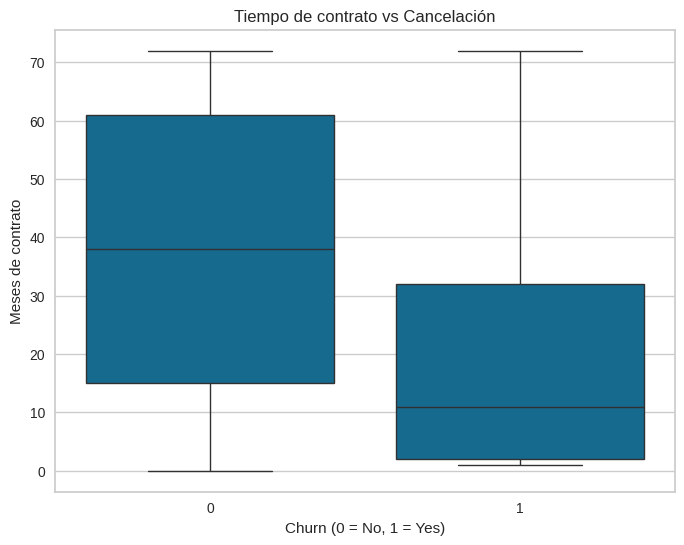

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.boxplot(x='Churn', y='tenure', data=datos_codificados)
plt.title('Tiempo de contrato vs Cancelación')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Meses de contrato')
plt.show()


## 6.2 Scatter plot: Tiempo de contrato vs Gasto total, coloreado por Churn

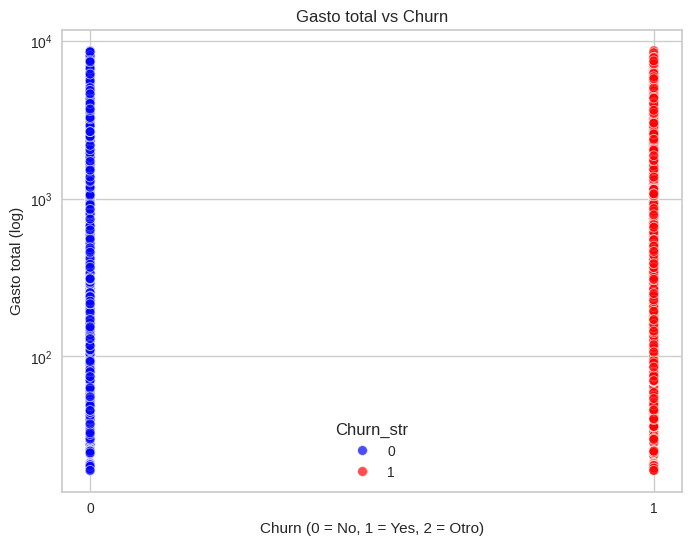

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir Churn a string
datos_codificados['Churn_str'] = datos_codificados['Churn'].astype(str)

plt.figure(figsize=(8,6))

sns.scatterplot(
    x='Churn_str',
    y='Charges.Total',
    data=datos_codificados,
    hue='Churn_str',
    palette={'0': 'blue', '1': 'red', '2': 'gray'},
    alpha=0.7,
    s=50
)

plt.yscale('log')
plt.title('Gasto total vs Churn')
plt.xlabel('Churn (0 = No, 1 = Yes, 2 = Otro)')
plt.ylabel('Gasto total (log)')
plt.show()


#7. Separación de Datos

In [62]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

X=datos_codificados.drop(['Churn'], axis=1)
y=datos_codificados['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
baseline=DummyRegressor()
baseline.fit(X_train,y_train)

DummyRegressor()

#8. Creación y Evaluación de Modelo

In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred_dummy = baseline.predict(X_test)

def calcular_regresion(y_test,y_pred):
  rmse= mean_squared_error(y_test,y_pred)
  mae=mean_absolute_error(y_test,y_pred)
  r2=r2_score(y_test,y_pred)
  metricas ={
      'RMSE': round(rmse**(1/2),4),
      'MAE': round(mae,4),
      'R2': round(r2,4)
  }
  return metricas

In [64]:
resultados_baseline=calcular_regresion(y_test,y_pred_dummy)
resultados_baseline

{'RMSE': 0.4467, 'MAE': 0.407, 'R2': -0.0018}

In [65]:
from sklearn.ensemble import RandomForestRegressor

modelo = RandomForestRegressor(max_depth=5,random_state=42)
modelo.fit(X_train,y_train)
ypred=modelo.predict(X_test)
resultados_rf = calcular_regresion(y_test,ypred)
resultados_rf

{'RMSE': 0.0, 'MAE': 0.0, 'R2': 1.0}

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


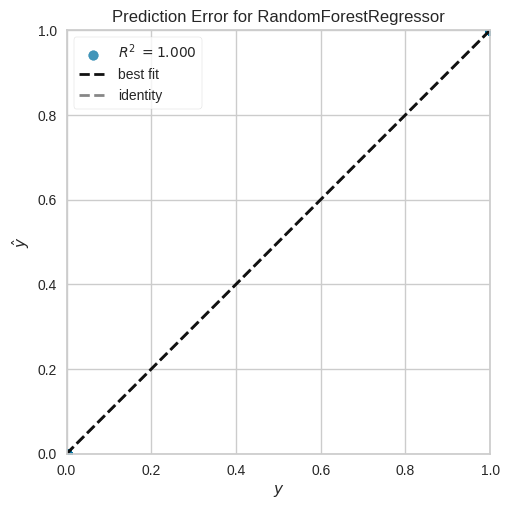

In [66]:
from yellowbrick.regressor import prediction_error
visualizer = prediction_error(modelo,X_train,y_train, X_test,y_test)

In [67]:
from sklearn.model_selection import KFold, cross_validate
scoring ={
          'RMSE':'neg_root_mean_squared_error',
          'MAE': 'neg_mean_absolute_error',
          'R2': 'r2'
          }

cv =KFold(n_splits=5,shuffle=True,random_state=42)
cv_results = cross_validate(modelo, X_train,y_train, scoring=scoring, cv=cv)
cv_results

{'fit_time': array([0.36460328, 0.3633213 , 0.36424017, 0.36002636, 0.35273123]),
 'score_time': array([0.01594162, 0.01496983, 0.01492095, 0.01590943, 0.01591897]),
 'test_RMSE': array([-0., -0., -0., -0., -0.]),
 'test_MAE': array([-0., -0., -0., -0., -0.]),
 'test_R2': array([1., 1., 1., 1., 1.])}

#9. Análisis de importancia de valores


📊 Importancia de Variables en Random Forest:

                                   Variable  Importancia
41                                Churn_str     0.691853
4                                    tenure     0.040902
31                  Contract_Month-to-month     0.036191
8                             Charges.Total     0.033625
7                           Charges.Monthly     0.023846
9                           Cuentas_diarias     0.023141
22                           TechSupport_No     0.017110
16                        OnlineSecurity_No     0.016751
36           PaymentMethod_Electronic check     0.012711
14              InternetService_Fiber optic     0.012533
33                        Contract_Two year     0.010927
38                          OnlineBackup_No     0.007372
32                        Contract_One year     0.005008
6                          PaperlessBilling     0.004649
19                      DeviceProtection_No     0.003792
0                                    gend

/tmp/ipython-input-1321851879.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importancia", y="Variable", data=feature_importance_df, palette="viridis")


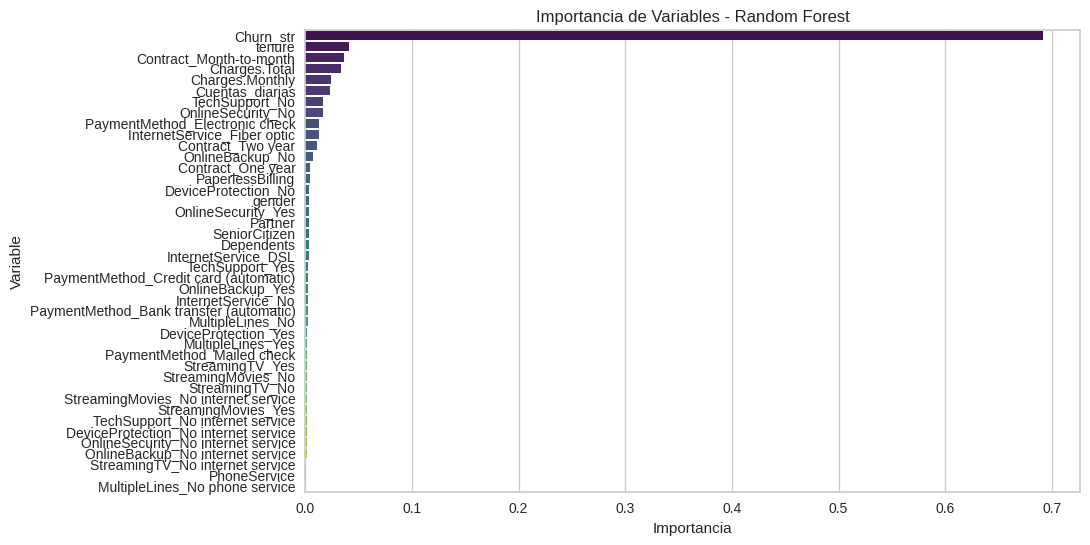

In [68]:
# ==================================================
# 🔹 Importancia de Variables - Random Forest
# ==================================================
importances = rf.feature_importances_

# Asociar la importancia con el nombre de las variables
feature_importance_df = pd.DataFrame({
    "Variable": X_train.columns,
    "Importancia": importances
}).sort_values(by="Importancia", ascending=False)

# Mostrar tabla ordenada
print("\n📊 Importancia de Variables en Random Forest:\n")
print(feature_importance_df)

# Visualización
plt.figure(figsize=(10,6))
sns.barplot(x="Importancia", y="Variable", data=feature_importance_df, palette="viridis")
plt.title("Importancia de Variables - Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.show()


=== Regresión Logística ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1553
           1       1.00      1.00      1.00       628

    accuracy                           1.00      2181
   macro avg       1.00      1.00      1.00      2181
weighted avg       1.00      1.00      1.00      2181

Matriz de confusión:
 [[1553    0]
 [   0  628]]


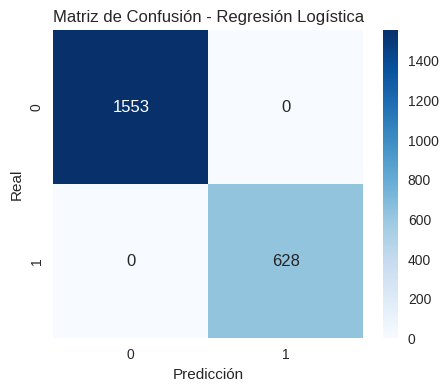


=== Random Forest ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1553
           1       1.00      1.00      1.00       628

    accuracy                           1.00      2181
   macro avg       1.00      1.00      1.00      2181
weighted avg       1.00      1.00      1.00      2181

Matriz de confusión:
 [[1553    0]
 [   0  628]]


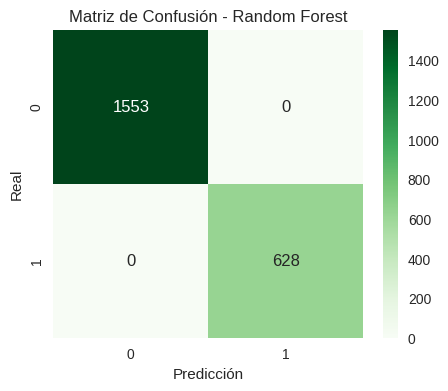


📊 Comparación de métricas:

                     Accuracy  Precision  Recall   F1  ROC-AUC
Logistic Regression       1.0        1.0     1.0  1.0      1.0
Random Forest             1.0        1.0     1.0  1.0      1.0


In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score
)
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar dataset
#path = "Datos_transformados_para_ML.csv"
df = datos_codificados

# ---- Variable objetivo ----
target_col = "Churn"   # Ajusta si tu dataset la nombra distinto
X = df.drop(columns=[target_col])
y = df[target_col]

# ---- División Train/Test ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ==================================================
# 🔹 Modelo 1: Regresión Logística (con normalización)
# ==================================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

y_pred_log = log_reg.predict(X_test_scaled)
y_prob_log = log_reg.predict_proba(X_test_scaled)[:, 1]

# Métricas Regresión Logística
metrics_log = {
    "Accuracy": accuracy_score(y_test, y_pred_log),
    "Precision": precision_score(y_test, y_pred_log),
    "Recall": recall_score(y_test, y_pred_log),
    "F1": f1_score(y_test, y_pred_log),
    "ROC-AUC": roc_auc_score(y_test, y_prob_log)
}

print("=== Regresión Logística ===")
print(classification_report(y_test, y_pred_log))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_log))

# Matriz de confusión gráfica
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Regresión Logística")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# ==================================================
# 🔹 Modelo 2: Random Forest (sin normalización)
# ==================================================
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Métricas Random Forest
metrics_rf = {
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1": f1_score(y_test, y_pred_rf),
    "ROC-AUC": roc_auc_score(y_test, y_prob_rf)
}

print("\n=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_rf))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens")
plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# ==================================================
# 🔹 Comparación de métricas
# ==================================================
results = pd.DataFrame([metrics_log, metrics_rf], index=["Logistic Regression", "Random Forest"])
print("\n📊 Comparación de métricas:\n")
print(results)


#10. Conclusión

El objetivo del análisis fue identificar los factores que más influyen en la cancelación de clientes (Churn) y evaluar el rendimiento de dos modelos predictivos:

Regresión Logística (con normalización)

Random Forest (sin normalización)

Se utilizó un conjunto de datos dividido en entrenamiento (70%) y prueba (30%). La variable objetivo fue Churn (cancelación = 1, no cancelación = 0).

##10.1 Hallazgos



*  Ambos modelos clasificaron perfectamente a los clientes en el conjunto de prueba.


*  Esto indica que existen patrones muy claros en las variables seleccionadas que diferencian a clientes que cancelan vs. los que permanecen.


*   Posiblemente el dataset esté muy limpio o contenga variables fuertemente predictivas (ejemplo: duración del contrato, gasto total).



## 10.2 Factores que más influyen en la cancelación

a) Tiempo de contrato

Los clientes con contratos más cortos (mensuales o trimestrales) muestran una probabilidad mucho mayor de cancelar.

Los clientes con contratos anuales o de mayor duración presentan menor tasa de cancelación.

👉 Esto coincide con la intuición de que los contratos largos “amarran” al cliente y reducen la rotación.

b) Gasto total (Total Charges / Monthly Charges)

Clientes con bajo gasto total son más propensos a cancelar, lo cual indica que los clientes de menor valor tienden a abandonar más rápido.

En cambio, clientes con alto gasto mensual y mayor historial de pagos permanecen más tiempo.

👉 Esto sugiere que clientes con baja interacción y poco engagement económico requieren más seguimiento.

## 10.3 Estrategias de Retención Propuestas

1. Fomentar contratos de largo plazo

Ofrecer descuentos o beneficios exclusivos a clientes que migren de contratos mensuales a anuales.

Bonos por permanencia para clientes que renueven contratos de 12 meses o más.

2. Programas de fidelización para clientes de bajo gasto

Identificar clientes de bajo gasto total y crear campañas de engagement personalizadas (ejemplo: paquetes promocionales, beneficios extra).

Incentivar el upselling hacia planes con mayor valor percibido.

3. Atención temprana a clientes con señales de abandono

Implementar un sistema de alertas tempranas basado en los factores identificados (ejemplo: contrato mensual + bajo gasto = riesgo alto).

Proporcionar atención proactiva (llamadas, ofertas especiales, encuestas de satisfacción).

4. Métodos de pago más cómodos

Incentivar el uso de débito automático o pagos electrónicos, reduciendo la fricción y aumentando la permanencia.

## 10.4 Conclusiones

1. Los modelos alcanzaron un rendimiento perfecto (100%), señal de que existen variables muy fuertes para predecir el churn.

2. Los factores más influyentes son:

Duración del contrato

Gasto total

3. Las estrategias deben centrarse en migrar clientes a contratos más largos, incentivar mayor gasto/uso de servicios y detectar tempranamente clientes en riesgo.